# MANUAL DE LABORATORIO DE COMUNICACIONES DIGITALES CON PYTHON
F. Javier Payán Somet, Juan José Murillo-Fuentes, José Carlos Aradillas Jaramillo \
_Departamento de Teoría de la Señal y Comunicaciones_ \
_Escuela Técnica Superior de Ingeniería_ \
_Universidad de Sevilla_ 

# Tema 1 – Introduction a Python para Comunicaciones Digitales

**Este notebook contiene código del Tema 1**

<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/gapsc-us/labcomdig/blob/main/Tema1.Intro2Python.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
</table>

## Inicialización

##### Nos aseguramos primero de que se incluyen algunos módulos necesarios con las versiones adecuadas así como que Python 3 está instalado, se sugiere usar 3.5 aunque una inferior podría funcionar. Se comprueba que la versión de Numpy es igual o superior a 1.16. También, que las figuras con MatplotLib se incluyen "inline" y preparamos una función para salvar figuras. 

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Numpy ≥1.16 is required
import numpy as np
assert np.__version__ >= "1.16"

# Common imports
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
DIRECTORIO_RAIZ_PROYECTO = "."
CAPITULO_ID = "intro"
PATH_IMAGES = os.path.join(DIRECTORIO_RAIZ_PROYECTO, "images", CAPITULO_ID)
os.makedirs(PATH_IMAGES, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolucion=300):
    path = os.path.join(PATH_IMAGES, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolucion)

# Ignore useless warnings
import warnings
warnings.filterwarnings(action="ignore") #Ignorar warnings

## Primeras líneas

In [2]:
 print("Hola mundo")

Hola mundo


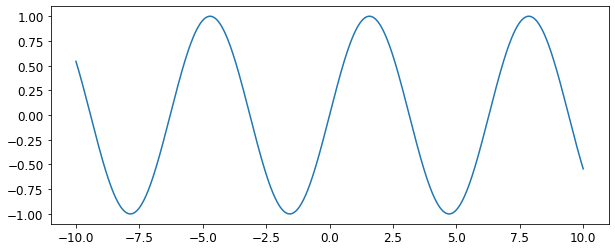

In [3]:
# Comentario: representamos un seno
x=np.linspace(-10.,10., 1000) # Comenzamos por definir el eje de abcisas

''' 
 Párrafo con comentarios:
 A continuación representamos la figura 
'''
plt.figure(figsize=(10, 4)) #Muy similar a Matlab/Octave
plt.plot(x,np.sin(x))
plt.show()

## Aspectos Básicos
### Primeros pasos

In [4]:
x = 1+2+3+4+5
+6+7+8 #En Jupyter se sigue con la línea de debajo


21

En línea de comando se usaría `/` Permite dividir línea en dos

In [5]:
y = (1+2+3+4+5+ #Permite dividir línea en dos usando paréntesis
6+7+8)

In [6]:
z = x+y; w = x-y #dos sentencias en una línea, aunque no se recomienda
# Se prefiere
z = x+y
w = x-y

Los espacios son importantes en Python, en particular en los bucles y condicionales

In [7]:
total = 0
for i in range(10):   #Luego se introducirán más ejemplos de bucles
    total += i
print(total)

45


El resultado es diferente si se introducen espacios delante del print

In [8]:
total = 0
for i in range(10):   #Luego se introducirán más ejemplos de bucles
    total += i
    print(total)

0
1
3
6
10
15
21
28
36
45


En Python las variables son objetos y se puede acceder a sus atributos y métodos, de diferentes formas.

In [9]:
x = 3.25
print(x.real, "+" , x.imag, "i")
x.as_integer_ratio()

3.25 + 0.0 i


(13, 4)

In [10]:
print(3.25.real, "+" , 3.25.imag, "i")
3.25.as_integer_ratio()

3.25 + 0.0 i


(13, 4)

In [11]:
x.as_integer_ratio()
float.as_integer_ratio(x)
float.as_integer_ratio(3.25)

(13, 4)

No hay que declarar el tipo...

In [12]:
x = 4
print(type(x))
x = 'Comunicaciones Digitales'
print(type(x))
x = [1,2,3]
print(type(x))

<class 'int'>
<class 'str'>
<class 'list'>


Las variables en realidad son punteros:

In [13]:
x = [1, 2, 3]
y = x
print(y)
x.append(4) #añade 4 a la lista apuntada por x
print(y)

[1, 2, 3]
[1, 2, 3, 4]


In [14]:
x = [5, 6, 7]
print(x)
print(y)

[5, 6, 7]
[1, 2, 3, 4]


### Tipos Mutables e inmutables


In [15]:
L = ['pam', 'psk', 'qam'] # Una lista de tres datos del tipo str 2
L

['pam', 'psk', 'qam']

In [16]:
L.append('fsk')
L

['pam', 'psk', 'qam', 'fsk']

In [17]:
dir(L)

['__add__',
 '__class__',
 '__contains__',
 '__delattr__',
 '__delitem__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__mul__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__reversed__',
 '__rmul__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'append',
 'clear',
 'copy',
 'count',
 'extend',
 'index',
 'insert',
 'pop',
 'remove',
 'reverse',
 'sort']

In [18]:
L.reverse()
L

['fsk', 'qam', 'psk', 'pam']

Los tipos de variables inmutables no admiten modificación:

In [19]:
T = ('pam', 'psk', 'qam', 'fsk')
# T.reverse()  #Try to uncomment and run to see an error, for it is 
  #inmutable 

### Uso de import

In [20]:
import numpy  
a=numpy.array([1,2,3])
a
type(a)

numpy.ndarray

In [21]:
from numpy import array
a = array([1, 2, 3])
type(a)

numpy.ndarray

In [22]:
import numpy as np #We already did this at the very start of 
   #the notebook
a = np.array([1, 2, 3])
type(a)

numpy.ndarray

### La clase `ndarray` de NumPy

In [23]:
A = np.array([1, 2, 3, 4, 5])
A

array([1, 2, 3, 4, 5])

In [24]:
print(A.ndim)
print(A.shape)

1
(5,)


In [25]:
A = np.array([[1],[2],[3],[4],[5]])
A

array([[1],
       [2],
       [3],
       [4],
       [5]])

In [26]:
print(A.ndim)
print(A.shape)

2
(5, 1)


In [27]:
A = np.array([1, 2, 3, 4, 5])
A

array([1, 2, 3, 4, 5])

In [28]:
print(A.ndim)
print(A.shape)

1
(5,)


In [29]:
Afila = A[np.newaxis,:]
Afila

array([[1, 2, 3, 4, 5]])

In [30]:
print(Afila.shape)
print(Afila.ndim)

(1, 5)
2


In [31]:
Acol = A[:,np.newaxis]
Acol

array([[1],
       [2],
       [3],
       [4],
       [5]])

In [32]:
print(Acol.shape)
print(Acol.ndim)

(5, 1)
2


**Código 1.1**

In [33]:
A = np.array([[1, 2], [3, 4], [5, 6]])
A

array([[1, 2],
       [3, 4],
       [5, 6]])

In [34]:
print(A.shape)
print(np.shape(A))
print(A.size)
print(np.ndim(A))

(3, 2)
(3, 2)
6
2


In [35]:
B = np.array([1, 2, 3, 4, 5, 6])
B

array([1, 2, 3, 4, 5, 6])

In [36]:
print(B.ndim)
print(B.shape)

1
(6,)


In [37]:
C = np.array([[1, 2, 3, 4, 5, 6]])
C

array([[1, 2, 3, 4, 5, 6]])

In [38]:
print(C.ndim)
print(C.shape)
print(A.nbytes)
print(C.nbytes)
print(C.dtype)

2
(1, 6)
48
48
int64


### Construcción de arrays

In [39]:
A = np.array([1,2,3]) # Definición de un array de una dimensión (1-D).
print('A=',A)
print("No̲ de dimensiones de A:", A.ndim, ", Shape de A:", A.shape)

# Definición de un array dos dimensiones (2-D) ( 1,3) (vector fila).
B = np.array([[1,2,3]]) 
print('B=',B)
#Obsérvese el doble corchete.
print("No̲ de dimensiones de B:", B.ndim, ", Shape de B:", B.shape)

# Definición de un array dos dimensiones (2- D) (3,1) (vector columna).
C = np.array([[1],[2],[3]]) 
print('C=',C)
print("No̲ de dimensiones de C:", C.ndim, ", Shape de C:", C.shape)

D = np.array([[[0], [1], [2]]])
print('D=',D)
print("No̲ de dimensiones de D:", C.ndim, ", Shape de C:", C.shape)

A= [1 2 3]
No̲ de dimensiones de A: 1 , Shape de A: (3,)
B= [[1 2 3]]
No̲ de dimensiones de B: 2 , Shape de B: (1, 3)
C= [[1]
 [2]
 [3]]
No̲ de dimensiones de C: 2 , Shape de C: (3, 1)
D= [[[0]
  [1]
  [2]]]
No̲ de dimensiones de D: 2 , Shape de C: (3, 1)


### Generación de arrays

In [40]:
x = np.arange(9) #Un array 1-D formado por números comprendidos
#entre 0 y 9, excluyendo el 9
x

array([0, 1, 2, 3, 4, 5, 6, 7, 8])

In [41]:
y = np.arange(1, 8, 2) # Un array 1-D formado por números comprendidos
#entre 1 y 8 de dos en dos
y

array([1, 3, 5, 7])

Arrays incrementados linealmente o logarítmicamente:

In [42]:
np.linspace(0, 10, 20)

array([ 0.        ,  0.52631579,  1.05263158,  1.57894737,  2.10526316,
        2.63157895,  3.15789474,  3.68421053,  4.21052632,  4.73684211,
        5.26315789,  5.78947368,  6.31578947,  6.84210526,  7.36842105,
        7.89473684,  8.42105263,  8.94736842,  9.47368421, 10.        ])

In [43]:
np.linspace(0, 10, 10)

array([ 0.        ,  1.11111111,  2.22222222,  3.33333333,  4.44444444,
        5.55555556,  6.66666667,  7.77777778,  8.88888889, 10.        ])

In [44]:
np.logspace(0, 2, 8)

array([  1.        ,   1.93069773,   3.72759372,   7.19685673,
        13.89495494,  26.82695795,  51.79474679, 100.        ])

In [45]:
np.logspace(0,8,10, base=2)

array([  1.        ,   1.85174942,   3.42897593,   6.34960421,
        11.75787594,  21.77264   ,  40.3174736 ,  74.65785853,
       138.24764658, 256.        ])

Indicando nombre parámetros

In [46]:
x = np.arange(start=1,stop=9)
x

array([1, 2, 3, 4, 5, 6, 7, 8])

In [47]:
y = np.arange(start=1,stop=8,step=2)
y

array([1, 3, 5, 7])

Vectores de ceros y unos

In [48]:
np.zeros([2,3])

array([[0., 0., 0.],
       [0., 0., 0.]])

In [49]:
np.ones(4)

array([1., 1., 1., 1.])

In [50]:
np.ones(4).shape

(4,)

In [51]:
np.ones([4,2])

array([[1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.]])

In [52]:
np.ones([4,2], dtype=np.complex64)

array([[1.+0.j, 1.+0.j],
       [1.+0.j, 1.+0.j],
       [1.+0.j, 1.+0.j],
       [1.+0.j, 1.+0.j]], dtype=complex64)

In [53]:
np.ones([4,2], dtype=np.complex64).dtype

dtype('complex64')

In [54]:
np.diag([1,2,3,4])

array([[1, 0, 0, 0],
       [0, 2, 0, 0],
       [0, 0, 3, 0],
       [0, 0, 0, 4]])

In [55]:
np.diag([1,2,3,4],k=2)

array([[0, 0, 1, 0, 0, 0],
       [0, 0, 0, 2, 0, 0],
       [0, 0, 0, 0, 3, 0],
       [0, 0, 0, 0, 0, 4],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]])

In [56]:
np.diag([1,2,3,4],k=-1)

array([[0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 2, 0, 0, 0],
       [0, 0, 3, 0, 0],
       [0, 0, 0, 4, 0]])

In [57]:
np.eye(3,4)

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.]])

### Generación de números aleatorios

In [58]:
np.random.rand(1, 10) #Genera un array 2-D (1,10) de valores de una 
# va uniformemente distribuida entre [0, 1]

array([[0.37454012, 0.95071431, 0.73199394, 0.59865848, 0.15601864,
        0.15599452, 0.05808361, 0.86617615, 0.60111501, 0.70807258]])

In [59]:
np.random.randint(-5,5, [1,10]) #Genera un array 2-D (1,10) de valores de una 
#va discreta uniformemente distribuida entre [-5, 5)

array([[ 0, -1, -4,  2,  0, -4, -1, -5,  4,  0]])

In [60]:
np.random.randint(-5,5, [1,10]).shape

(1, 10)

In [61]:
2*np.random.randn(1,10)+1 #Genera un array 2-D (1,10) de valores de una
#v.a. gaussiana de media 1 y varianza 4

array([[-0.0502457 ,  4.82554254, -3.05343923,  3.23884722,  2.55838527,
        -1.20219551,  3.26045639,  1.74623783,  0.2270541 , -1.31754048]])

### Operador `np.kron`

In [62]:
A = np.array([[1,0,2,0,3]])
B = np.array([[1,2,3]])
np.kron(A,B)

array([[1, 2, 3, 0, 0, 0, 2, 4, 6, 0, 0, 0, 3, 6, 9]])

### Concatenación y separación de arrays

In [63]:
a = np.array([[1, 2]]); b = np.array([[3, 4]]); c = np.array([[5],[6]])
np.concatenate([a,b])

array([[1, 2],
       [3, 4]])

In [64]:
#np.concatenate([a,c]) #try, will prompt an error because of dimensions

In [65]:
np.concatenate([b,a,b])

array([[3, 4],
       [1, 2],
       [3, 4]])

In [66]:
d=np.concatenate([a, b])
d

array([[1, 2],
       [3, 4]])

In [67]:
e=np.concatenate([b, a])
e

array([[3, 4],
       [1, 2]])

In [68]:
np.concatenate([d,e])

array([[1, 2],
       [3, 4],
       [3, 4],
       [1, 2]])

In [69]:
np.concatenate([d,e],axis=1)

array([[1, 2, 3, 4],
       [3, 4, 1, 2]])

In [70]:
np.append(d,e,axis=0)

array([[1, 2],
       [3, 4],
       [3, 4],
       [1, 2]])

In [71]:
np.append(d,e)

array([1, 2, 3, 4, 3, 4, 1, 2])

In [72]:
np.r_[b,a,b]

array([[3, 4],
       [1, 2],
       [3, 4]])

In [73]:
np.c_[d,c]

array([[1, 2, 5],
       [3, 4, 6]])

In [74]:
np.c_[d,e]

array([[1, 2, 3, 4],
       [3, 4, 1, 2]])

In [75]:
x = np.array([1,2,3])
x.ndim

1

In [76]:
A = np.array([[9,8,7],[4,5,6]])
A.ndim

2

In [77]:
A.shape

(2, 3)

In [78]:
np.vstack([x,A]) # Apilar verticalmente

array([[1, 2, 3],
       [9, 8, 7],
       [4, 5, 6]])

In [79]:
np.vstack([A,x])

array([[9, 8, 7],
       [4, 5, 6],
       [1, 2, 3]])

In [80]:
y = np.array([[0],[0]])
y.ndim

2

In [81]:
y.shape

(2, 1)

In [82]:
np.hstack([y,A])

array([[0, 9, 8, 7],
       [0, 4, 5, 6]])

In [83]:
A = np.random.randint(1,50, size=[6,6]) # Generación de una matriz de 
#enteros aleatorios siguiendo una distribución uniforme 
#entre [1,50) (no incluye el 50), de tamaño 6x6
A

array([[40,  4,  2,  6, 42,  4],
       [29, 18, 26, 44, 34, 10],
       [36, 14, 31, 48, 15,  8],
       [14, 23, 40, 21, 16, 45],
       [18, 47, 24, 26, 25, 45],
       [41, 29, 15, 45,  1, 25]])

In [84]:
A1, A2, A3 = np.split(A, [3,5])
A1

array([[40,  4,  2,  6, 42,  4],
       [29, 18, 26, 44, 34, 10],
       [36, 14, 31, 48, 15,  8]])

In [85]:
A2

array([[14, 23, 40, 21, 16, 45],
       [18, 47, 24, 26, 25, 45]])

In [86]:
A3

array([[41, 29, 15, 45,  1, 25]])

### Direccionamiento de los elementos de un array de una dimensión

In [87]:
a = np.arange(10)

In [88]:
a.shape

(10,)

In [89]:
a.ndim

1

In [90]:
a[0]

0

In [91]:
a[-2]

8

In [92]:
a[3:7]

array([3, 4, 5, 6])

In [93]:
a[0:7:2]

array([0, 2, 4, 6])

In [94]:
a[::-1]

array([9, 8, 7, 6, 5, 4, 3, 2, 1, 0])

In [95]:
a[:5]

array([0, 1, 2, 3, 4])

In [96]:
a[8:0:-2]

array([8, 6, 4, 2])

### Direccionamiento de los elementos de un array multidimensional

In [97]:
 np.random.seed(8) # Permite cambiar la semilla 
    # del generador aleatorio

In [98]:
A = np.random.randint(1,50, size=[6,6]) # Generación de 
# una matriz de enteros aleatorios siguiendo una 
#distribución uniforme entre [1,50), (no incluye el 50). 
# De tamaño 6x6
A

array([[ 4, 21, 42,  6, 27,  9],
       [20, 41, 49, 46, 22, 11],
       [28, 45, 14, 10, 16, 30],
       [35, 19, 15, 39, 30, 10],
       [ 5,  8, 43, 42, 27,  3],
       [39, 10, 38, 47, 18, 44]])

In [99]:
A[2,3]

10

In [100]:
A[1,:] # Selecciona completa la fila 1 
# (recuérdese que la numeración comienza con el 0)

array([20, 41, 49, 46, 22, 11])

In [101]:
A[1,] # Selecciona completa la 
# fila 1 (una expresión equivalente)

array([20, 41, 49, 46, 22, 11])

In [102]:
A[:,2] # Selecciona completa la columna 2

array([42, 49, 14, 15, 43, 38])

In [103]:
A[3:5] # Selecciona las filas 3 hasta la 5 
# (excluyendo la 5). A[3:5,] es una expresión equivalente

array([[35, 19, 15, 39, 30, 10],
       [ 5,  8, 43, 42, 27,  3]])

In [104]:
A[:,3:5] # Selecciona las columnas 3 hasta la 5 
# (excluyendo la 5)

array([[ 6, 27],
       [46, 22],
       [10, 16],
       [39, 30],
       [42, 27],
       [47, 18]])

In [105]:
A[[1,2,4],:] # Selecciona las filas 1, 2, 4 completas

array([[20, 41, 49, 46, 22, 11],
       [28, 45, 14, 10, 16, 30],
       [ 5,  8, 43, 42, 27,  3]])

In [106]:
A[5,1:4] # De la fila 5, selecciona los elementos entre 
# las columnas 1 a 4, excluyendo el de la columna 4

array([10, 38, 47])

In [107]:
A[1:3,3:] # De las filas 1 a 3 (excluyendo la 3), 
#selecciona los elementos de la columna 3 hasta el final

array([[46, 22, 11],
       [10, 16, 30]])

In [108]:
A[-1,:]

array([39, 10, 38, 47, 18, 44])

In [109]:
np.random.seed(8) # Para obtener mismo resultados 
A = np.random.randint(1,50,size=[6,6])
B = np.eye(np.shape(A)[0]) #np.shape(A)[0] devuelve 
# el tamaño de la dimensión 0 de la matriz A. Recordad 
# que np.shape(A) o A.shape devuelve un secuencia (tuple) 
# con el número de elementos de A en cada eje

In [110]:
B

array([[1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1.]])

In [111]:
B[[1,3,4],:]=A[0:3,:]

In [112]:
B

array([[ 1.,  0.,  0.,  0.,  0.,  0.],
       [ 4., 21., 42.,  6., 27.,  9.],
       [ 0.,  0.,  1.,  0.,  0.,  0.],
       [20., 41., 49., 46., 22., 11.],
       [28., 45., 14., 10., 16., 30.],
       [ 0.,  0.,  0.,  0.,  0.,  1.]])

### Incremento y reducción de dimensiones de arrays

In [113]:
# Aumentamos dimensiones de array de un elemento
A = np.array(5)
A.shape

()

In [114]:
A = np.array(5); A.shape

()

In [115]:
R1 = np.expand_dims(B,axis=0)
R1.shape

(1, 6, 6)

In [116]:
R2 = A[np.newaxis]; 
R2.shape

(1,)

In [117]:
R2 = A[np.newaxis]
R2.shape

(1,)

In [118]:
R3 = A[None]
R3.shape

(1,)

In [119]:
R4 = A.reshape(-1,)
R4.shape

(1,)

In [120]:
# Generamos la segunda dimension, tiene que estar creada 
#la primera
C1 = np.expand_dims(R1,axis=1) 
C1.shape

(1, 1, 6, 6)

In [121]:
C2 = R2[np.newaxis]
C2.shape

(1, 1)

In [122]:
C3 = R3[None]
C3.shape

(1, 1)

In [123]:
C4 = R4.reshape(1,1)
C4.shape

(1, 1)

In [124]:
B = np.array([1, 2, 3])
B.shape

(3,)

In [125]:
R1 = np.expand_dims(B,axis=0)
R1.shape

(1, 3)

In [126]:
#Es interesante ver que al forzar incluir la primera 
 #dimensión, pasa los datos a la segunda
R2 = B[np.newaxis]
R2.shape

(1, 3)

In [127]:
R3 = B[None]
R3.shape

(1, 3)

In [128]:
R4 = B.reshape(-1,)
R4.shape

(3,)

In [129]:
C1 = np.expand_dims(B,axis=1)
C1.shape

(3, 1)

In [130]:
C2 = B[:,np.newaxis]
C2.shape

(3, 1)

In [131]:
C3 = B[:,None]
C3.shape

(3, 1)

In [132]:
C4 = B.reshape(-1,1)
C4.shape

(3, 1)

In [133]:
# Aumentamos en varias dimensiones un array de 
# varios elementos
C = np.array([1, 2, 3, 4, 5])
C.shape

(5,)

In [134]:
V1 = C[np.newaxis,:,np.newaxis,np.newaxis,np.newaxis]
V1.shape

(1, 5, 1, 1, 1)

In [135]:
V2 = C[None,:,None,None,None]
V2.shape

(1, 5, 1, 1, 1)

In [136]:
V3 = C.reshape(1,-1,1,1,1)
V3.shape

(1, 5, 1, 1, 1)

Eliminamos dimensiones:

In [137]:
x = np.array([[[0], [1], [2]]])
x.shape

(1, 3, 1)

In [138]:
x1 = np.squeeze(x)
x1

array([0, 1, 2])

In [139]:
x1.shape

(3,)

In [140]:
x2 = np.squeeze(x, axis=(0,))
x2

array([[0],
       [1],
       [2]])

In [141]:
x3 = np.squeeze(x, axis=(2,))
x3

array([[0, 1, 2]])

In [142]:
x3.shape

(1, 3)

In [143]:
x4 = x.reshape(-1)
x4

array([0, 1, 2])

In [144]:
x4.shape

(3,)

### Manipulación de dimensiones y formas (`shape`) de arrays

In [145]:
A = np.random.randint(1,50, size = [4,4])
A

array([[16, 29, 28, 44],
       [23, 32, 21, 46],
       [22,  9, 29, 29],
       [32, 48, 11,  1]])

In [146]:
A.flatten()

array([16, 29, 28, 44, 23, 32, 21, 46, 22,  9, 29, 29, 32, 48, 11,  1])

In [147]:
np.append(A,[[0,0,0],[1,2,3]])

array([16, 29, 28, 44, 23, 32, 21, 46, 22,  9, 29, 29, 32, 48, 11,  1,  0,
        0,  0,  1,  2,  3])

In [148]:
np.append(A, [[0,0,0,0]], axis=0)

array([[16, 29, 28, 44],
       [23, 32, 21, 46],
       [22,  9, 29, 29],
       [32, 48, 11,  1],
       [ 0,  0,  0,  0]])

In [149]:
np.append(A, [[0],[0],[0],[0]], axis=1)

array([[16, 29, 28, 44,  0],
       [23, 32, 21, 46,  0],
       [22,  9, 29, 29,  0],
       [32, 48, 11,  1,  0]])

In [150]:
A.reshape([2,8])

array([[16, 29, 28, 44, 23, 32, 21, 46],
       [22,  9, 29, 29, 32, 48, 11,  1]])

In [151]:
np.reshape(A,[2,8], order='C')

array([[16, 29, 28, 44, 23, 32, 21, 46],
       [22,  9, 29, 29, 32, 48, 11,  1]])

In [152]:
np.reshape(A,[2,8], order='F')

array([[16, 22, 29,  9, 28, 29, 44, 29],
       [23, 32, 32, 48, 21, 11, 46,  1]])

In [153]:
np.arange(6).reshape([3,2])

array([[0, 1],
       [2, 3],
       [4, 5]])

In [154]:
np.arange(6).reshape([3,2], order='F')

array([[0, 3],
       [1, 4],
       [2, 5]])

## Operaciones con arrays

In [155]:
A = np.array([[1,3],[4,2]])
A

array([[1, 3],
       [4, 2]])

In [156]:
B = np.array([[1,1],[1,0]])
B

array([[1, 1],
       [1, 0]])

In [157]:
A+B

array([[2, 4],
       [5, 2]])

In [158]:
A*B

array([[1, 3],
       [4, 0]])

In [159]:
E = np.dot(A,B)

In [160]:
F = np.dot(A,np.linalg.inv(B))
F

array([[ 3., -2.],
       [ 2.,  2.]])

In [161]:
np.dot(F,B)

array([[1., 3.],
       [4., 2.]])

In [162]:
G = np.linalg.solve(A,B)

In [163]:
np.dot(A,G)

array([[1., 1.],
       [1., 0.]])

In [164]:
H=A+1j*B
H

array([[1.+1.j, 3.+1.j],
       [4.+1.j, 2.+0.j]])

In [165]:
H.conjugate().T

array([[1.-1.j, 4.-1.j],
       [3.-1.j, 2.-0.j]])

In [166]:
H.T

array([[1.+1.j, 4.+1.j],
       [3.+1.j, 2.+0.j]])

In [167]:
np.linalg.matrix_power(A,2)

array([[13,  9],
       [12, 16]])

In [168]:
A**2

array([[ 1,  9],
       [16,  4]])

In [169]:
A**B

array([[1, 3],
       [4, 1]])

In [170]:
a = np.array([1,2,3])
a

array([1, 2, 3])

In [171]:
np.vdot(a,a)

14

In [172]:
A = np.array([[1,2,-1],[-3,-1,1],[1,-1,1]])
A

array([[ 1,  2, -1],
       [-3, -1,  1],
       [ 1, -1,  1]])

In [173]:
b = np.array([[5],[8],[0]])
b

array([[5],
       [8],
       [0]])

In [174]:
x = np.linalg.solve(A,b)
x

array([[-2.],
       [ 9.],
       [11.]])

## Texto

In [175]:
a = 3.4235                                                  
b = 7                                                       
print('A vale %.2f y b vale %d' % (a,b)) #f float, d decimal

A vale 3.42 y b vale 7


In [176]:
a = 3.4235                                                  
b = 7                                                       
print('A vale {:.2f} y b vale {}'.format(a,b)) 

A vale 3.42 y b vale 7


## Operadores relacionales y lógicos

In [177]:
A = np.array([[1,2],[3,4]])
B=np.array([[1,0],[5,4]])

In [178]:
A

array([[1, 2],
       [3, 4]])

In [179]:
B

array([[1, 0],
       [5, 4]])

In [180]:
A==B

array([[ True, False],
       [False,  True]])

In [181]:
A>B

array([[False,  True],
       [False, False]])

In [182]:
A!=B

array([[False,  True],
       [ True, False]])

In [183]:
np.sum(A!=B)

2

In [184]:
a = np.arange(10)
a

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [185]:
b = 7-a
b

array([ 7,  6,  5,  4,  3,  2,  1,  0, -1, -2])

In [186]:
np.logical_and(a>b, b>2)

array([False, False, False, False,  True, False, False, False, False,
       False])

In [187]:
r = np.logical_or(a<b, b<2)
r

array([ True,  True,  True,  True, False, False,  True,  True,  True,
        True])

In [188]:
np.logical_not(r)

array([False, False, False, False,  True,  True, False, False, False,
       False])

#### Utilización de la función `np.where`

In [189]:
x = np.array([[3, -1, 4, 0, -8, 0, 2]])

In [190]:
np.where(x)

(array([0, 0, 0, 0, 0]), array([0, 1, 2, 4, 6]))

In [191]:
y=x[np.where(x)]
y

array([ 3, -1,  4, -8,  2])

In [192]:
x = np.array([[3, -1, 4, 0, -8, 0, 2]])

In [193]:
np.where(x>=2)

(array([0, 0, 0]), array([0, 2, 6]))

In [194]:
z=x[np.where(x>=2)]
z

array([3, 4, 2])

## Gráficos

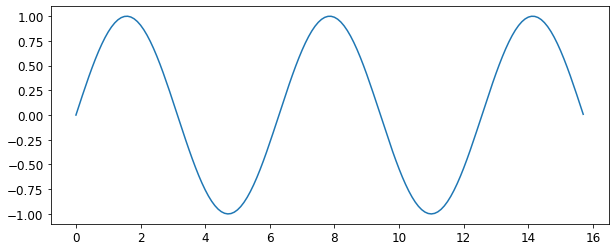

In [195]:
#%matplotlib  #descomentar para que la figura no aparezca
# dentro del noteboook sino como una figura nueva
import matplotlib.pyplot as plt
t = np.arange(0,5*np.pi,0.1)
plt.figure(figsize=(10, 4))
plt.plot(t,np.sin(t))
plt.show()

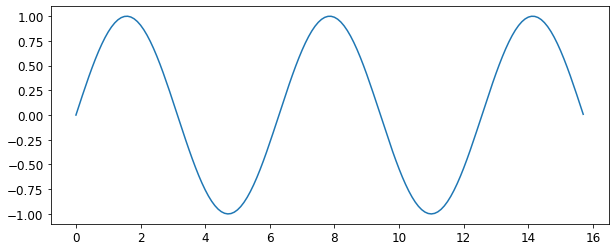

In [196]:
t = np.arange(0,5*np.pi,0.1)
plt.figure(figsize=(10, 4))
plt.plot(t,np.sin(t))
plt.show()

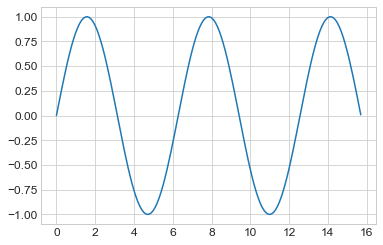

In [197]:
plt.style.use('seaborn-whitegrid')
fig, ax = plt.subplots()
t = np.arange(0,5*np.pi,0.1)
ax.plot(t,np.sin(t))

### Funciones gráficas elementales 2D

#### Función `stem`

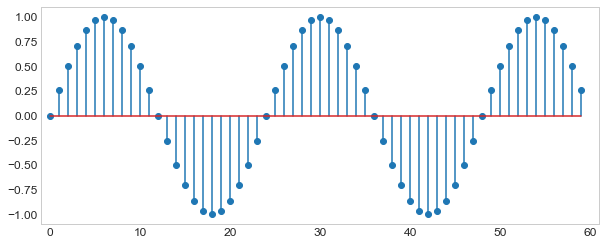

Saving figure stem


<Figure size 432x288 with 0 Axes>

In [198]:
N = np.arange(60)
plt.figure(figsize=(10, 4))
plt.stem(np.sin(N*np.pi/12))
plt.axis([-1,61,-1.1,1.1])
plt.grid()
plt.show()
save_fig("stem")

#### Función `plot`

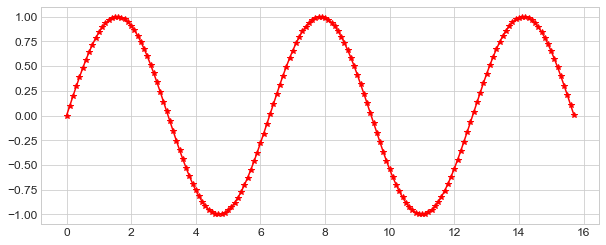

In [199]:
t = np.arange(0,5*np.pi,0.1)
plt.figure(figsize=(10, 4))
plt.plot(t,np.sin(t), '*-r')
plt.show()

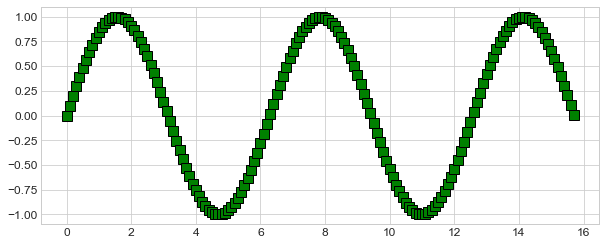

In [200]:
t = np.arange(0,5*np.pi,0.1)
plt.figure(figsize=(10, 4))
plt.plot(t,np.sin(t),'-.rs', linewidth=4, markeredgecolor='k', markerfacecolor='g', markersize=10)
plt.show()

In [201]:
t = np.arange(0,5*np.pi,0.1)
plt.figure(,figsize=(10, 4))
plt.plot(t,np.sin(t)) 
plt.plot(t,np.sin(t)**2-1)
plt.show()

SyntaxError: invalid syntax (<ipython-input-201-b9015bbb48ed>, line 2)

In [ ]:
x = np.linspace(0,10,1000) 
y1 = (x/2)**2
y2 = x**2
y3 = 4 + (x/2)**2
plt.plot(x,y1,x,y2,x,y3) 
plt.title('Polinomios de x')
plt.xlabel('$x$') 
plt.ylabel('$f(x)$')
plt.legend(['$(x/2)^2$','$x^2$','$4 + (x/2)^2$']) 
plt.grid('on')
plt.show()
save_fig("Polinomios")

In [ ]:
#Igual pero utilizando clases
fig, ax = plt.subplots()
x = np.linspace(0,10,1000) 
y1 = (x/2)**2
y2 = x**2
y3 = 4 + (x/2)**2
ax.plot(x,y1,x,y2,x,y3)
ax.set(xlabel='x', ylabel='f(x)', title='Polinomios de $x$')
ax.legend(['$(x/2)^2$','$x^2$','$4 + (x/2)^2$'])
ax.grid('on')

#### Comando `subplot`

In [ ]:
t = np.arange(0,5*np.pi,0.1)
plt.figure(figsize=(10, 4))
plt.subplot(2,2,1), 
plt.title('$Sen(x)$'), plt.plot(t,np.sin(t))
plt.subplot(2,2,2), 
plt.title('$Cos(x)$'), plt.plot(t,np.cos(t))
plt.subplot(2,2,3), 
plt.title('$Sen^{2}(x)$'), plt.plot(t,np.sin(t)**2) 
plt.subplot(2,2,4), 
plt.title('$Cos^{2}(x)$'), plt.plot(t,np.cos(t)**2)
plt.tight_layout() # Para que no se solapen las subfiguras
#Alternativamente se puede usar:
#plt.subplots_adjust(hspace=0.5)
plt.show()
save_fig("subplots")

### Funciones gráficas elementales 3D

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
fi = np.arange(0,6*np.pi,np.pi/20) 
fig = plt.figure(,figsize=(10, 4))
ax2d = fig.add_subplot(1, 2, 1)
ax3d = fig.add_subplot(1, 2, 2, projection='3d')
ax2d.plot(np.cos(fi),np.sin(fi)), 
ax2d.grid(), ax2d.axis('square')
ax3d.plot(np.cos(fi),
np.sin(fi),fi), 
ax3d.grid()

In [ ]:
fig = plt.figure()
ax = fig.gca(projection='3d')

# Crea la rejilla de valores X, Y 
# cuando x varía entre (-3,3) e y varía entre (-3 ,3)
x = np.arange(-3, 3, 0.1) #0.01)
y = np.arange(-3, 3, 0.1) #0.01)
X, Y = np.meshgrid(x, y)

# Definición de la función a representar
Z=(1/(2*np.pi))*np.exp(-X**2-Y**2)*0.5

ax.plot_surface(X, Y, Z, cmap=plt.get_cmap('Spectral_r'))

In [ ]:
import matplotlib.cm as cm

fig = plt.figure()
ax = fig.gca(projection='3d')

# Crea la rejilla de valores X, Y 
# cuando x varía entre (--10,10) e y varía entre (-10,10)

x = np.arange(-10, 10, 0.1) #0.03)
y = np.arange(-10, 10, 0.1) #0.03) 

X, Y = np.meshgrid(x, y)

R=np.sqrt(X**2 + Y**2)
Z=np.sin(R)/R 
ax.plot_surface(X, Y, Z)
ax.plot_surface(X, Y, Z, cmap=cm.Spectral_r)
save_fig("hat")

## Programación en Python: bifurcaciones y bucles

### Sentencia `if`

In [ ]:
condicion1 = 0
condicion2 = 1
condicion3 = 1 #No se comprueba si alguna anterior no es cero 
bloque2 = 2, 
bloque3 = 3, 
bloque4 = 4

if condicion1:
    print(bloque1) # Indentación
elif condicion2: print(bloque2) #linea continua 
elif condicion3: 
    print(bloque3)
else: # Opción por defecto cuando no se cumplen las condiciones 1, 2, 3 
    print(bloque4) 

### Sentencia `while`

In [ ]:
sentencia=10
while condicion3 < 10:
    condicion3 += 1
    print(sentencia)

### Sentencia `for'

In [ ]:
objeto=np.arange(5)
for k in objeto: # Asigna a k los elementos del objeto
    print(sentencia) # Cuerpo que se repite. Utiliza k

In [ ]:
for k in objeto: # Asigna a k los elementos del objeto sentencias # Cuerpo que se repite. Utiliza k
    print(sentencia) # Se ejecutarán si no se ha salido con break
    if k == 4:
        break
else: # Una parte opcional
    print(sentencia) # Se ejecutarán si no se ha salido con break

In [ ]:
s=0
for k in range(2,100,2):
    s=s+k
    
print(s)

In [ ]:
T = ('PAM', 'QAM', 'PSK', 'OQPSK') 
for k in T: print(k, end = ' ')

In [ ]:
A = np.array([[1, 2],[5, 6]])
A

In [ ]:
for k in A:
    print(k)

# Ficheros de comandos y funciones

### Funciones 

In [ ]:
def mifuncion(entrada01, entrada02): # cuerpo de la función
    salida01 = entrada01
    salida02 = entrada02
    return [salida01, salida02]

a , b = mifuncion(2,3)
a,b

In [ ]:
def Qfunct(x): 
    '''
    y = Qfunct(x) evalúa la función Q en x.
    Donde y = 1/sqrt(2*pi) * integral desde x hasta inf de exp(-t^2/2) dt
    '''
    from scipy.special import erfc
    from math import sqrt 
    y=(1/2)*erfc(x/sqrt(2))
    return y

In [ ]:
help(Qfunct)

## Evitando errores comunes

In [ ]:
from numpy import pi, sin # En este caso se ha importado 
# pi y sin para evitar tener que escribir np.pi y np.sin
from matplotlib.pyplot import plot, axis #En este caso 
# se ha importado plot y axis para evitar tener que 
# escribir plt.plot y plt.axis
plt.figure(figsize=(16, 6))
x = np.arange(0,3*pi,pi/100) 
y = sin(x)
y = y*(y>0) # Importante ver esta línea y el papel de (y>0)
plot(x,y)
axis([0, 3*pi, 0, 1.1]) 
plt.show()

In [ ]:
eps = sys.float_info.epsilon # sis se cargó al comienzo
x = np.arange(-4*pi,4*pi,pi/100) 
x = x+(x==0)*eps  # Evita dividir por cero!!
plt.figure(figsize=(10, 4))
plot(x,sin(x)/x) 
axis([-15, 15, -0.3, 1.1])
plt.show()

In [ ]:
from numpy import tan
from matplotlib.pyplot import grid, subplot

eps=sys.float_info.epsilon
x = np.arange(-(3/2)*pi,(3/2)*pi,pi/100)
y = tan(x); subplot(1,2,1), plot(x,y)
grid(True)
y = y*(np.abs(y)<1e10);
plt.figure(figsize=(10, 4))
subplot(1,2,2), plot(x,y) 
grid('on') # True y 'on' son equivalentes
plt.show()

In [ ]:
from numpy import floor
from numpy.random import randn, seed
from time import time
from labcomdig import Qfunct

seed(42)
contador=0 
N=10**7
r = randn(N)+1

In [ ]:
startTime = time() 
for k in r:
    if k>0: 
        contador=contador+1

t = time()-startTime
teorico = floor((1-Qfunct(1))*N)
print('mayores que 0: ' + str(contador)) 
print('mayores que 0 (teóricos): ' + str(teorico))
print('tiempo transcurrido: ' + str(t))

In [ ]:
startTime = time()
contador=sum(r>0)
t = time()-startTime
teorico = floor((1-Qfunct(1))*N)
print('mayores que 0:   ' + str(contador))
print('mayores que 0 (teóricos):   ' + str(teorico))
print('tiempo transcurrido:   ' + str(t))

In [ ]:
from numpy import sum #Usamos el sum de numpy
startTime = time()
contador=np.sum(r>0)
t = time()-startTime
teorico = floor((1-Qfunct(1))*N)
print('mayores que 0:   ' + str(contador))
print('mayores que 0 (teóricos):   ' + str(teorico))
print('tiempo transcurrido:   ' + str(t))

### Otras técnicas de optimización

In [ ]:
# Alternativa con bucle for
from sympy import primerange

tic=time() 
N=1000;
s = 0;
for j in primerange(1,N):
    s=s+j
print('suma de los ' +str(N) +' primeros números primos: ' +str(s)) 
print('tiempo transcurrido :' +str(time()-tic))
# Alternativa sin bucle for
startTime = time()
s = np.sum(list(primerange(1,N)));
print('suma de los ' +str(N) +' primeros números primos: ' +str(s))
print('tiempo transcurrido :' +str(time()-startTime))

In [ ]:
from numpy.random import randint
from numpy import zeros 

# Alternativa con bucle for
N = 100
M = 100
x = randint(10,size=(M,N))
y = randint(10,size=(N,M)) 
z = zeros([M,M])
tic = time()
for k in range(M):
    for l in range(M): 
        z[k,l]=np.sum(x[k,:]*y[:,l])
print('tiempo transcurrido : ' +str(time()-tic))
# Alternativa sin bucle for
tic = time()
z = np.dot(x,y)
print('tiempo transcurrido : ' +str(time()-tic))

Ejemplo de criba de Eratóstenes Versión 1

In [ ]:
def criba01(lastNumber):
    from numpy import mod, where, array
    
    List = list(range(2, lastNumber))
    primeList = [];
    
    while(List[0]**2 <lastNumber):
        
        primeList.append(List[0]) 
        List = array(List)
        
        List = list(List[where(mod(List,List[0]))])

    primeList.extend(List)
    return primeList

Ejemplo de criba de Eratóstenes Versión 2

In [ ]:
def criba02(x):
    from NumPy import array, sqrt, arange 
    P = list(range(x))
    P = array(P)
    for n in range(2,int(sqrt(x))):
        if P[n]: 
            P[arange(2*n,x,n)] = 0
    P = P[P != 0] 
    return list(P)

## Simulación discreta de una señal de energía de duración finita

**Código 1.5**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Definamos los parámetros de la representación:
T = 4e-3 # Duración
L = 64 # Número de muestras que vamos a utilizar
Tm = T/L #Tiempo de muestreo (Intervalo de separación entre muestras)

t = np.arange(0,T,Tm) #Eje de tiempos.
# Definición de la señal
gt = np.ones(L) #La función evaluada en los puntos elegidos 
gt[L//2:] = -1
# La representación continua
plt.figure(1)
h = plt.plot(t,gt) #Se representa gt frente t
plt.axis([0, T, -1.1, 1.1])
plt.setp(h,'linewidth',1.0) #Permite fijar el grosor de línea
plt.ylabel('g(t)') #Etiqueta para el eje de ordenadas 
plt.xlabel('t(ms)') #Etiqueta para el eje de abscisas
plt.show()
save_fig("Continuous_Time_Pulse")

**Código 1.6**

In [ ]:
from numpy import ones
from matplotlib.pyplot import axis, setp, ylabel, xlabel, show, stem
# Observar que en este caso se han importado las funciones que se van a utilizar para evitar tener que escribir plt.axis, plt.ylabel...
L = 64 # Número de muestras que vamos a utilizar
# Definición de la señal de forma discreta
g1n = ones(L) 
g1n[L//2:] = -1
h = stem(g1n)
axis([1,L,-1.1,1.1])
setp(h,'linewidth',1.0)
ylabel('$g_1(n)$') # Texto entre $$ formato formulas latex xlabel('n')
show()
save_fig("Discrete_Pulse")

**Código 1.7**

In [ ]:
from numpy import ones, sqrt, arange
from matplotlib.pyplot import stem, axis, setp, ylabel, xlabel
# Definamos los parámetros de la representación: T = 4e-3 # Duración de la representación
L = 64 # Número de muestras que vamos a utilizar en la representación Tm = T/L # Tiempo de muestreo (Intervalo de separación entre muestras)
t = arange(0,T,Tm) # Eje de tiempos.
# Definicion de la señal continua
gt = ones(L) # La función evaluada en los puntos elegidos
gt[L//2:] = -1
# La secuencia discreta normalizada
g2n = sqrt(Tm)*gt
# Su representación
h = stem(g2n)
axis( [-1, L+1, -sqrt(Tm)*1.1, sqrt(Tm)*1.1])
setp(h,'linewidth', 1.0) 
ylabel('g_{2}(n)')
xlabel('n');

**Código 1.8**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros de diseño
E = 4
T = 4e-3
L = 8

# Tiempo entre muestras
Tm = T/L

# Señal discreta de energía E
sn = np.ones(L)
En = sn@sn   #Energía del pulso sin normalizar
sn = np.sqrt(E/En)*sn

# Energía de la señal discreta
msg = 'Energía de la señal discreta sn: %.2f J'%(sn@sn) 
print (msg)

# Definición de la señal continua
st = np.sqrt(1/Tm)*sn

# Energía de la señal continua
msg = 'Energía de la señal continua st: %.2f J'%(st@st*Tm)
print (msg)

# Representación de las dos señales
plt.figure(figsize=(10, 4))
plt.subplot(1,2,1), plt.stem(sn, use_line_collection=True)
plt.xlabel('n'), plt.ylabel('sn(n)')
plt.axis([0,L+1, 0, max(sn)*1.1])
t = np.arange(0,T,Tm)
plt.subplot(1,2,2), plt.plot(t,st)
plt.xlabel('t[s]'), plt.ylabel('st(t)')
plt.axis([0, T, 0, max(st)*1.1])
plt.tight_layout()
plt.show()